In [1]:
import pandas as pd
import re 
import numpy as np

In [2]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.shape

(891, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df['Age'].mean()

29.69911764705882

<Axes: >

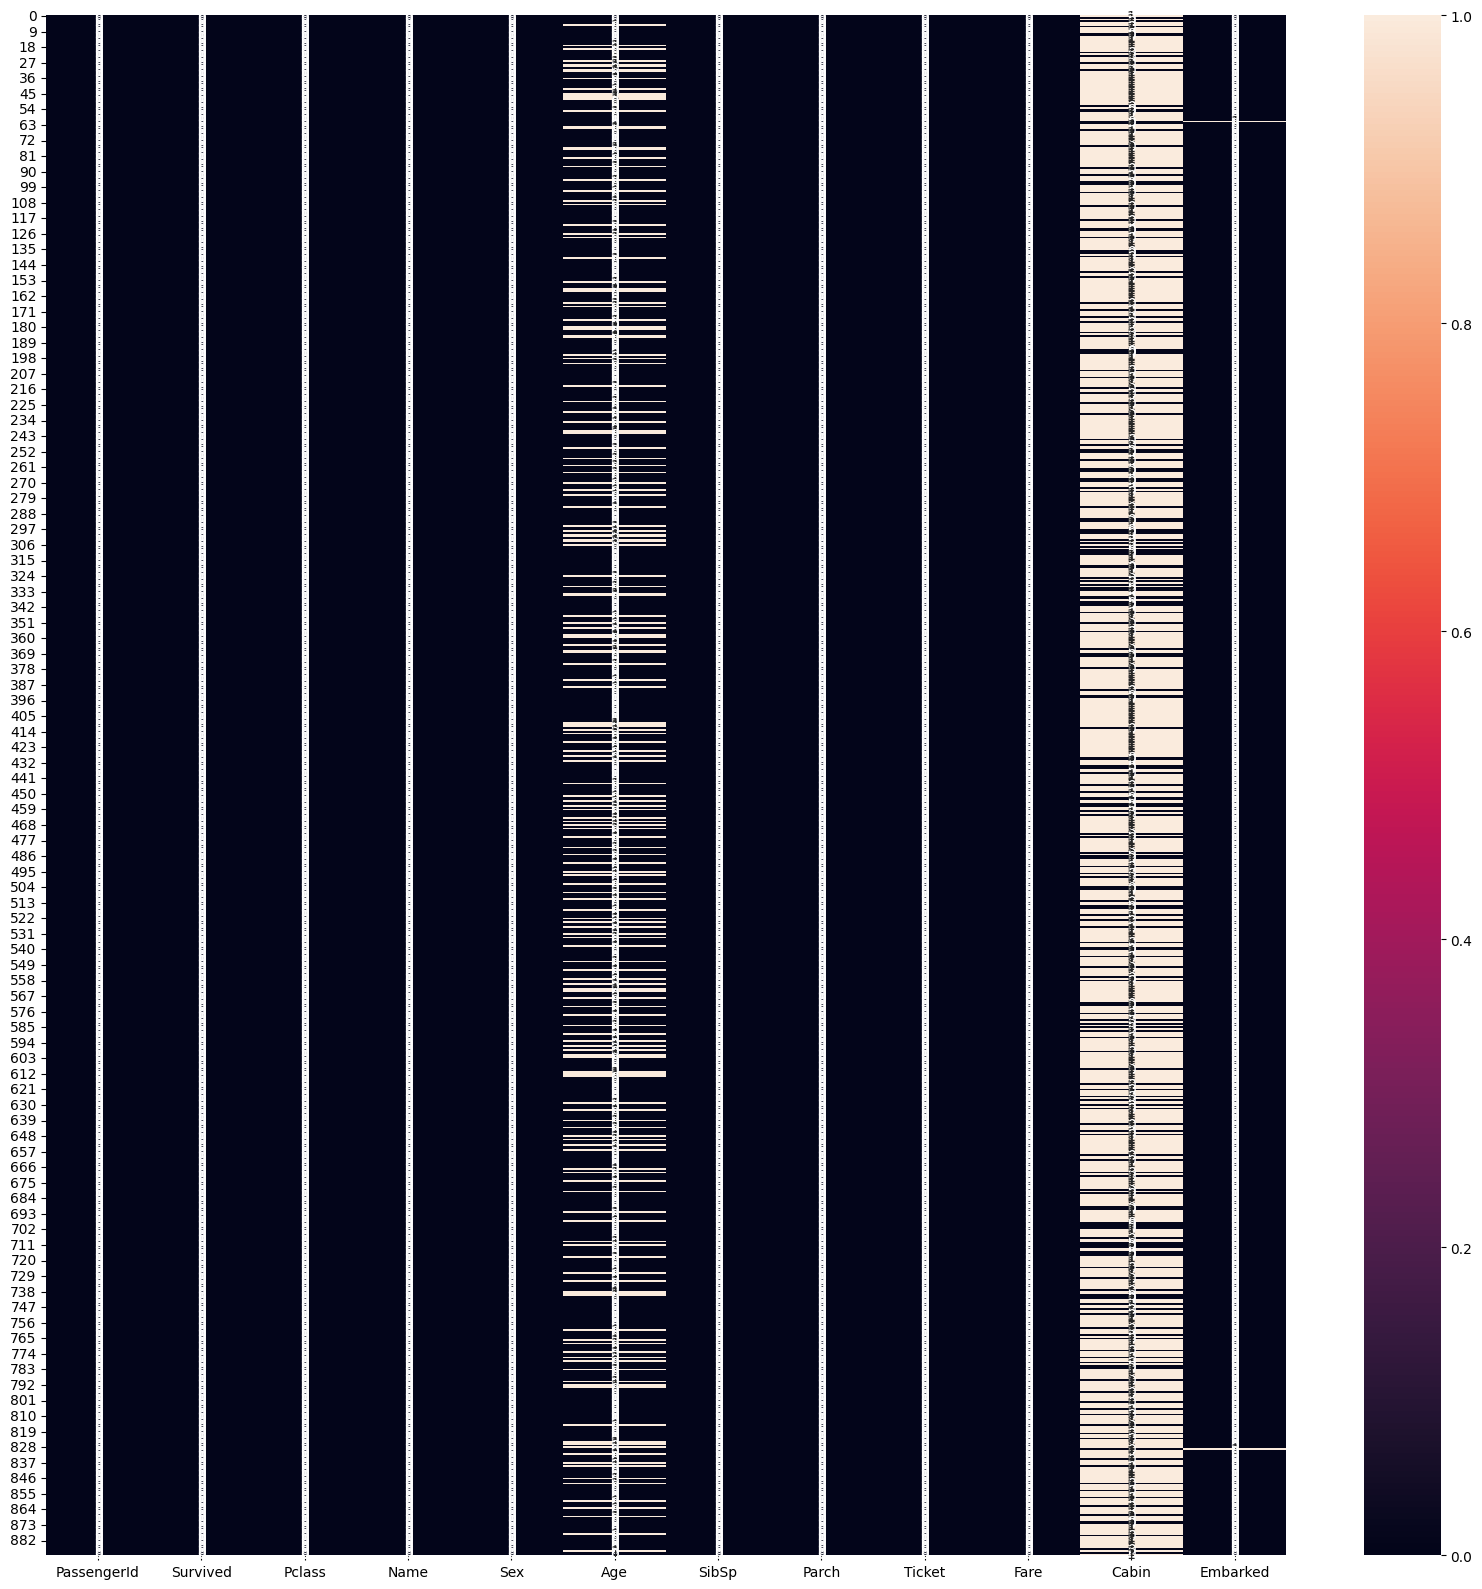

In [9]:

import seaborn as sns
plt.figure(figsize=(20,20))
sns.heatmap(df.isna(),annot = True)

In [10]:
(df['Age'].isna().sum()/len(df))*100

19.865319865319865

In [11]:
df[df['Age'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [12]:
(df['Cabin'].isna().sum()/len(df))*100

77.10437710437711

In [13]:
(df['Embarked'].isna().sum()/len(df))*100

0.22446689113355783

In [14]:
from sklearn.preprocessing import LabelEncoder

In [16]:
df.drop('Cabin',inplace = True,axis = 1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [17]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [18]:
df[df['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [19]:
df.drop([61,829],axis = 0,inplace=True)

In [20]:
df.shape

(889, 11)

In [21]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [22]:
mean_age = df.Age.mean()

In [23]:
df[df['Pclass'] == 1]['Embarked'].value_counts()

S    127
C     85
Q      2
Name: Embarked, dtype: int64

In [24]:
df[df['Pclass'] == 2]['Embarked'].value_counts()

S    164
C     17
Q      3
Name: Embarked, dtype: int64

In [25]:
df[df['Pclass'] == 3]['Embarked'].value_counts()

S    353
Q     72
C     66
Name: Embarked, dtype: int64

In [26]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [27]:
import math
age_fill = math.floor(mean_age)

In [28]:
df['Age'].fillna(age_fill)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [29]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [30]:
df[df['Age'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,Q
...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,S


In [31]:
df[df['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


In [32]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [33]:
df.fillna(age_fill,inplace=True)

In [34]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [36]:
df['Age'] = df['Age'].astype('int')

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    int32  
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(1), int32(1), int64(5), object(4)
memory usage: 79.9+ KB


In [38]:
new = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')
new['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [39]:
df['Age'] = new['Age']

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [41]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

<Axes: >

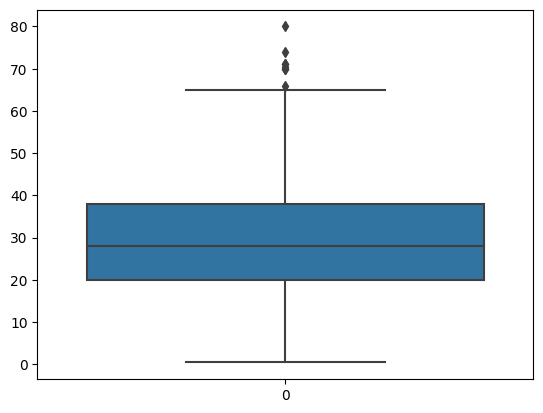

In [42]:
sns.boxplot(df['Age'])

In [43]:
df['Age'].median()

28.0

In [44]:
df['Age'].fillna(df['Age'].median(),inplace=True)
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [45]:
df['Age'] = df['Age'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    int32  
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(1), int32(1), int64(5), object(4)
memory usage: 112.2+ KB


In [46]:
df.drop(['PassengerId','Name'],axis = 1,inplace = True)

In [47]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22,1,0,A/5 21171,7.2500,S
1,1,1,female,38,1,0,PC 17599,71.2833,C
2,1,3,female,26,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35,1,0,113803,53.1000,S
4,0,3,male,35,0,0,373450,8.0500,S


In [48]:
label = LabelEncoder()
gender = label.fit_transform(df['Sex'])
gender

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,

In [49]:
df['Gender'] = gender

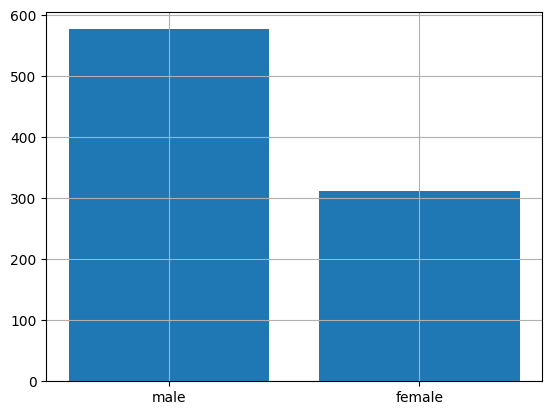

In [50]:
plt.bar(df['Sex'].unique(),df['Sex'].value_counts())
plt.grid()

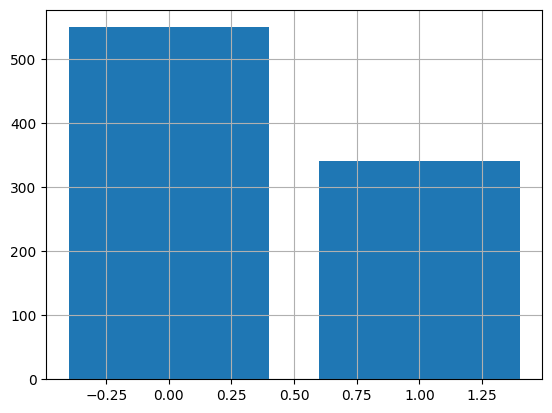

In [51]:
plt.bar(df['Survived'].unique(),df['Survived'].value_counts())
plt.grid()

In [52]:
df['Survived'].unique()

array([0, 1], dtype=int64)

<Axes: >

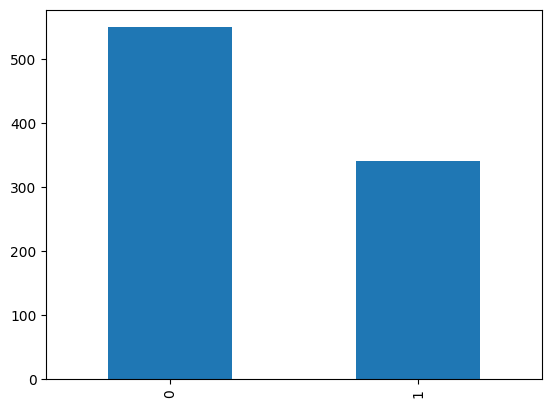

In [53]:
df['Survived'].value_counts().plot.bar(df['Survived'])

<Axes: >

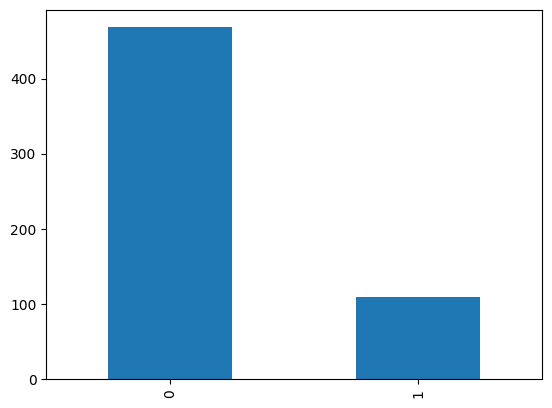

In [54]:
df[df['Sex'] == 'male']['Survived'].value_counts().plot.bar(df['Survived'])
# df[df['Sex'] == 'female']['Survived'].value_counts().plot.bar(df['Survived'])

In [55]:
df['Sex'].groupby(df['Survived']).value_counts()

Survived  Sex   
0         male      468
          female     81
1         female    231
          male      109
Name: Sex, dtype: int64

<Axes: xlabel='Survived,Sex'>

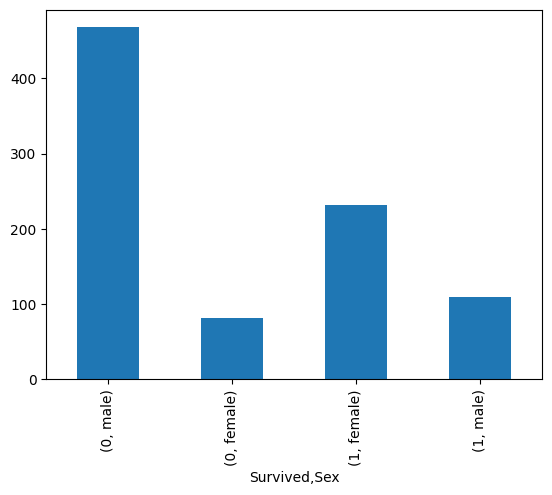

In [56]:
df['Sex'].groupby(df['Survived']).value_counts().plot.bar(df['Sex'])

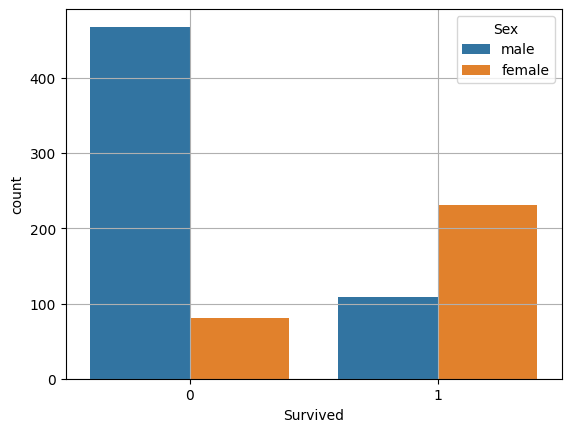

In [57]:
sns.countplot(data=df,x = 'Survived',hue='Sex')
plt.grid()

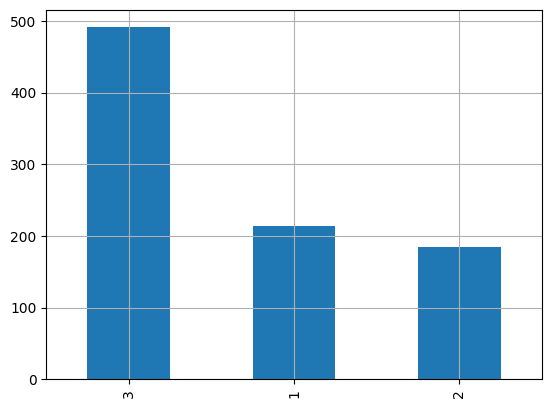

In [58]:
df['Pclass'].value_counts().plot.bar(df['Pclass'])
plt.grid()

In [59]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Gender
0,0,3,male,22,1,0,A/5 21171,7.2500,S,1
1,1,1,female,38,1,0,PC 17599,71.2833,C,0
2,1,3,female,26,0,0,STON/O2. 3101282,7.9250,S,0
3,1,1,female,35,1,0,113803,53.1000,S,0
4,0,3,male,35,0,0,373450,8.0500,S,1


In [60]:
df.drop('Sex',axis = 1,inplace = True)

In [61]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Embarked,Gender
0,0,3,22,1,0,A/5 21171,7.2500,S,1
1,1,1,38,1,0,PC 17599,71.2833,C,0
2,1,3,26,0,0,STON/O2. 3101282,7.9250,S,0
3,1,1,35,1,0,113803,53.1000,S,0
4,0,3,35,0,0,373450,8.0500,S,1


In [62]:
df.insert(7,'Embarked_label',label.fit_transform(df['Embarked']))

In [63]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Embarked_label,Embarked,Gender
0,0,3,22,1,0,A/5 21171,7.2500,2,S,1
1,1,1,38,1,0,PC 17599,71.2833,0,C,0
2,1,3,26,0,0,STON/O2. 3101282,7.9250,2,S,0
3,1,1,35,1,0,113803,53.1000,2,S,0
4,0,3,35,0,0,373450,8.0500,2,S,1


In [64]:
df.drop('Embarked',axis = 1,inplace= True)

In [65]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Embarked_label,Gender
0,0,3,22,1,0,A/5 21171,7.2500,2,1
1,1,1,38,1,0,PC 17599,71.2833,0,0
2,1,3,26,0,0,STON/O2. 3101282,7.9250,2,0
3,1,1,35,1,0,113803,53.1000,2,0
4,0,3,35,0,0,373450,8.0500,2,1


In [66]:
df['Fare'] = round(df['Fare'],2)

In [67]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Embarked_label,Gender
0,0,3,22,1,0,A/5 21171,7.25,2,1
1,1,1,38,1,0,PC 17599,71.28,0,0
2,1,3,26,0,0,STON/O2. 3101282,7.92,2,0
3,1,1,35,1,0,113803,53.10,2,0
4,0,3,35,0,0,373450,8.05,2,1


In [68]:
X = df.iloc[:,1:].values
X

array([[3, 22, 1, ..., 7.25, 2, 1],
       [1, 38, 1, ..., 71.28, 0, 0],
       [3, 26, 0, ..., 7.92, 2, 0],
       ...,
       [3, 28, 1, ..., 23.45, 2, 0],
       [1, 26, 0, ..., 30.0, 0, 1],
       [3, 32, 0, ..., 7.75, 1, 1]], dtype=object)

In [69]:
y = df.loc[:,'Survived'].values
y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Survived        889 non-null    int64  
 1   Pclass          889 non-null    int64  
 2   Age             889 non-null    int32  
 3   SibSp           889 non-null    int64  
 4   Parch           889 non-null    int64  
 5   Ticket          889 non-null    object 
 6   Fare            889 non-null    float64
 7   Embarked_label  889 non-null    int32  
 8   Gender          889 non-null    int32  
dtypes: float64(1), int32(3), int64(4), object(1)
memory usage: 91.3+ KB


In [71]:
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV,cross_val_score,KFold,StratifiedGroupKFold

<Axes: >

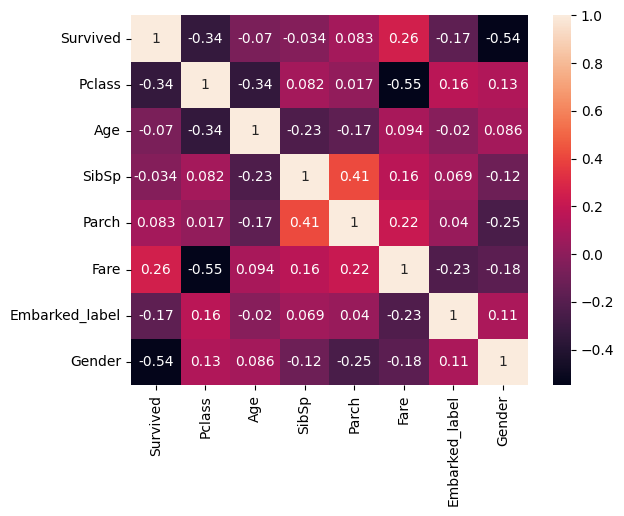

In [72]:
sns.heatmap(df.corr(),annot = True)

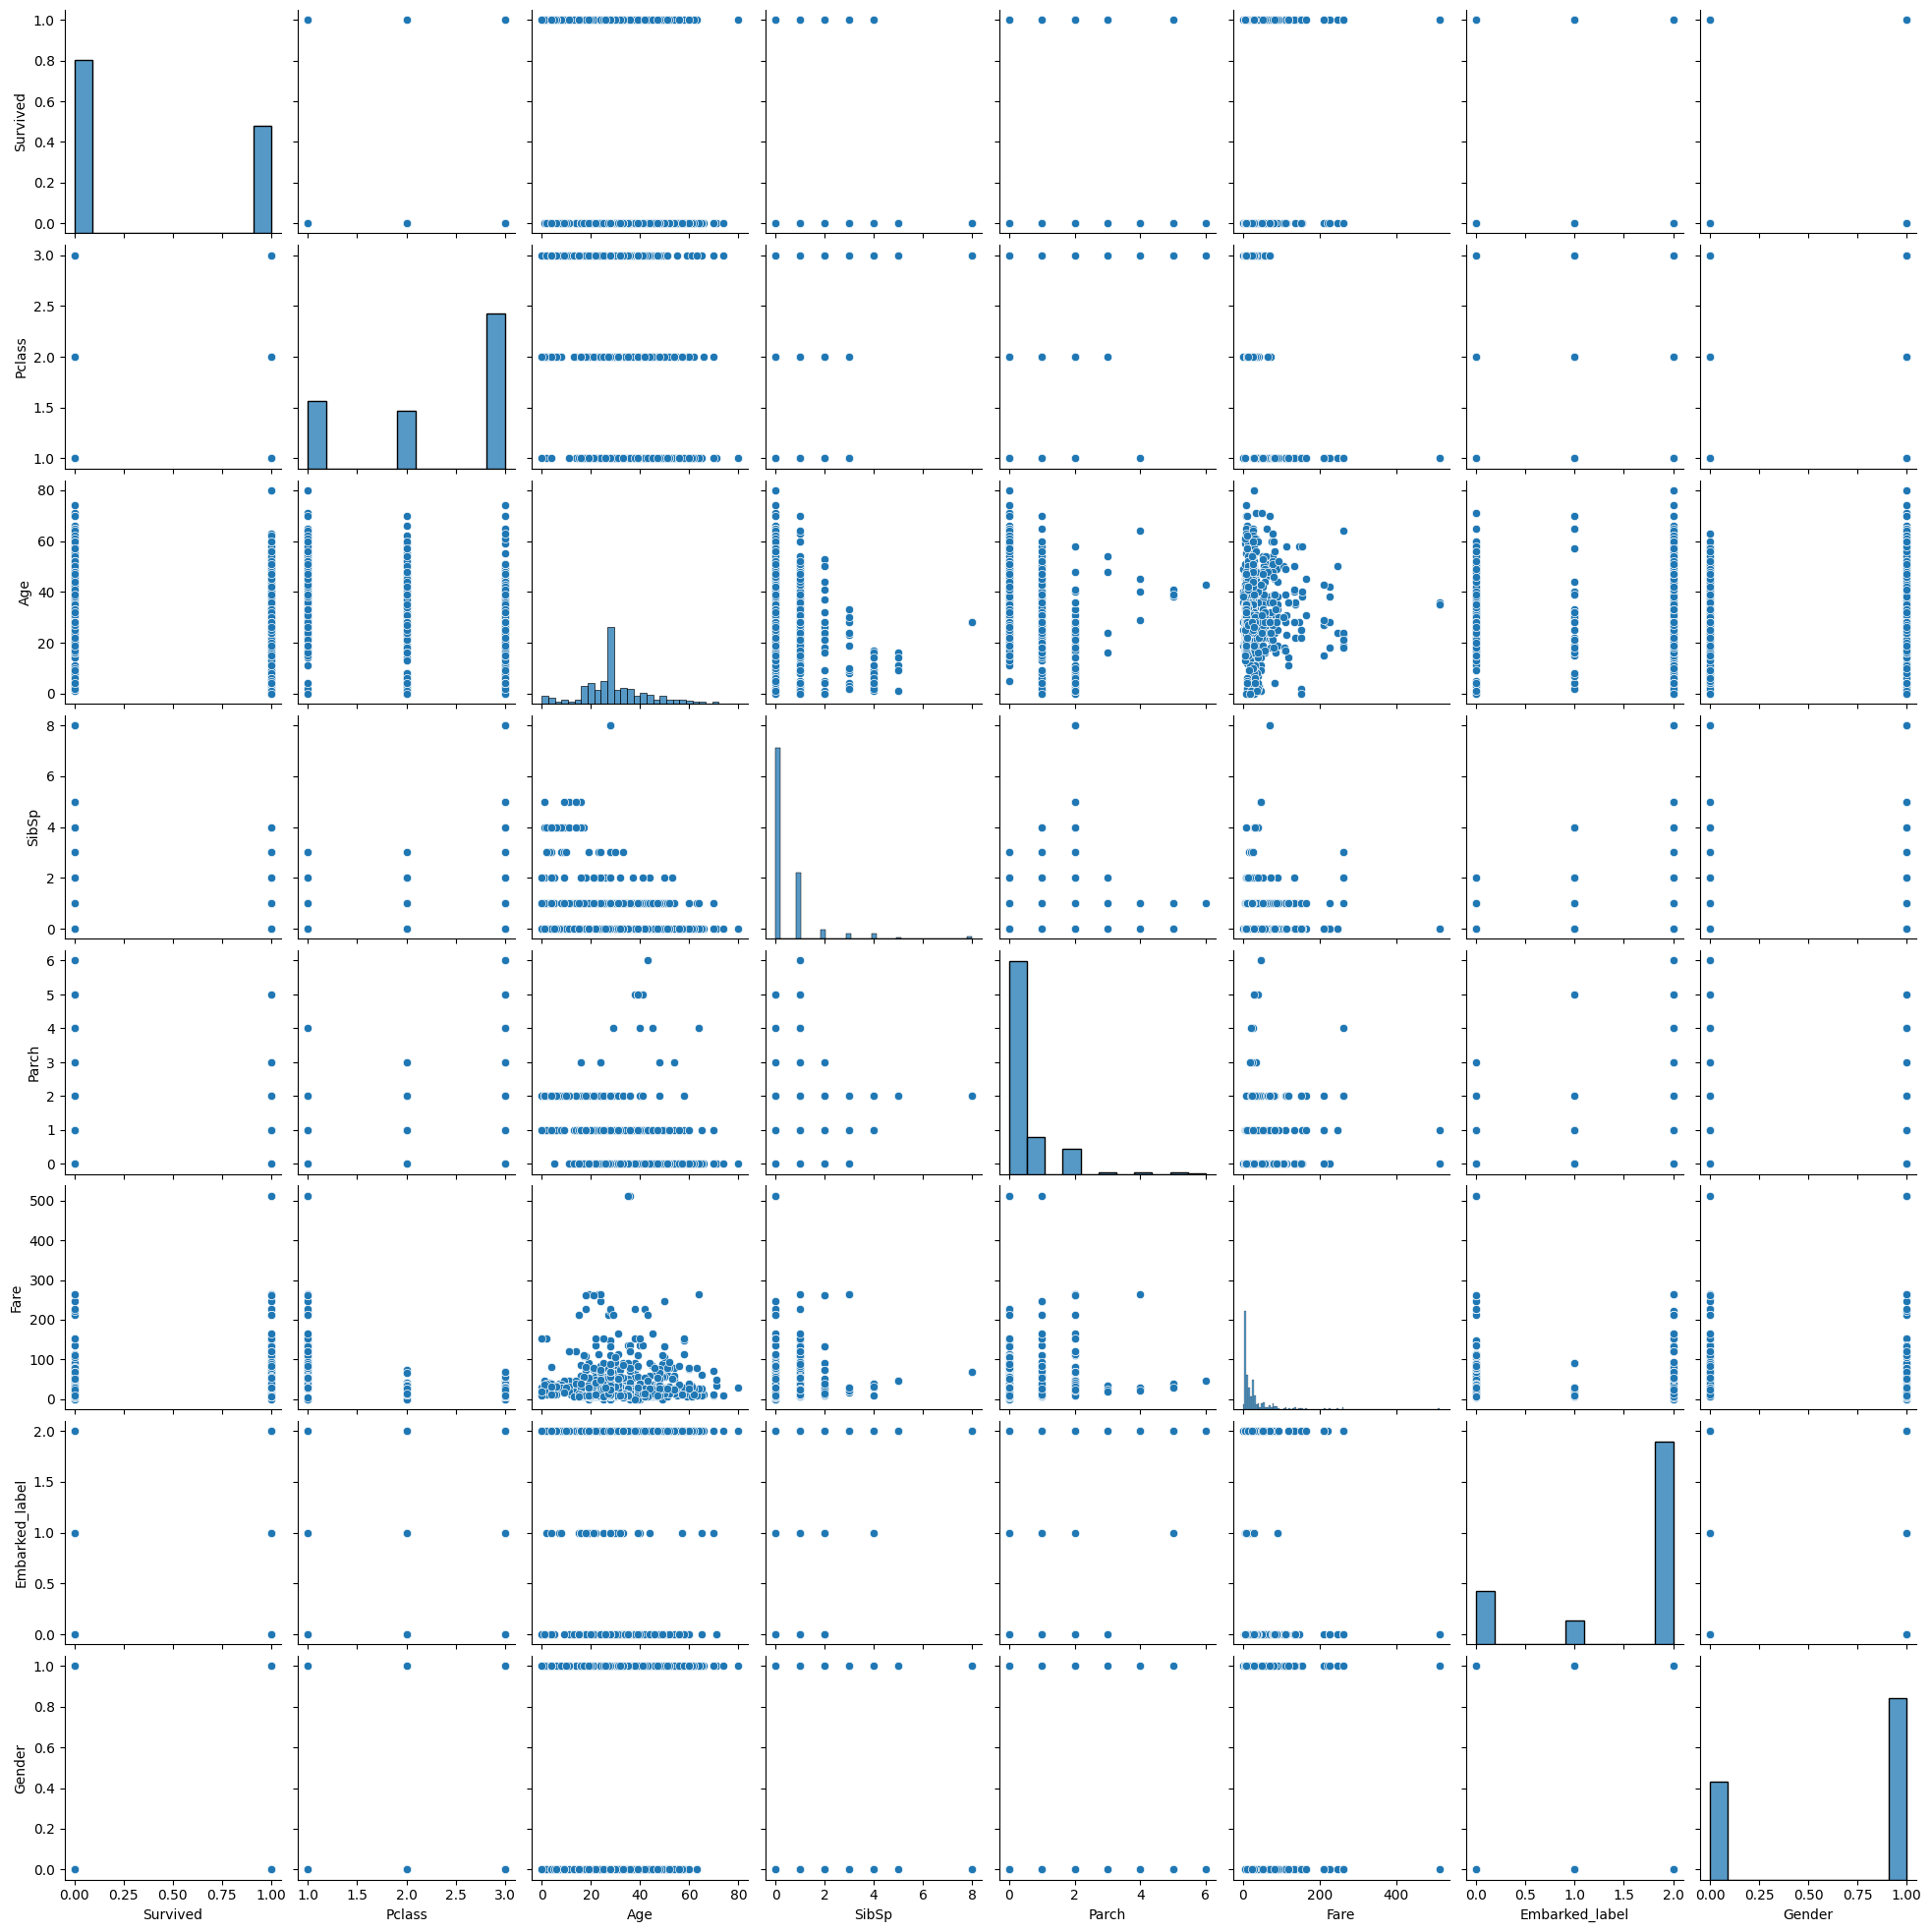

In [73]:
sns.pairplot(df)

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
tree = ExtraTreesClassifier()

In [ ]:
tree.fit(X,y)

In [ ]:
tree.feature_importances_

In [ ]:
# plt.figure(figsize=(10,10))
plt.barh(df.iloc[:,1:].columns,tree.feature_importances_)

In [ ]:
index=df.iloc[:,1:].columns
index


In [ ]:
model = LogisticRegression()
skf =StratifiedGroupKFold(n_splits = 5)
result = cross_val_score(estimator=model,X = X,y =y,cv = skf)
result

In [ ]:
kf = KFold(n_splits = 5)
result = cross_val_score(estimator = model ,X = X,y = y,cv = kf)

In [ ]:
result

In [ ]:
df.head()

In [ ]:
x = df.iloc[:,1:]
y = df.loc[:,'Survived']
x

In [ ]:
y

In [ ]:
# for train_index,test_index in skf.split(x,y):
#     x_train,x_test = x.iloc[train_index] ,x.iloc[test_index]
#     y_train,y_test = y.iloc[train_index] ,y.iloc[test_index]
    
# x_train

In [ ]:
x.head()

In [ ]:
y.head()

In [ ]:
x.shape

In [ ]:
y.shape

In [ ]:
from sklearn.datasets import load_iris
data = load_iris()
dir(data)

In [ ]:
for train,test in skf.split(data.data,data.target):
    x_train,x_test,y_train,y_test = data.data[train],data.data[test],data.target[train],data.target[test]

In [ ]:
x_train.shape

In [ ]:
x_test.shape

In [ ]:
model = LogisticRegression()
model.fit(x_train,y_train)

In [ ]:
for i in range(len(x_train)):
    print(x_train[i],y_train[i])

In [ ]:
x_train.shape

In [ ]:
y_pred = model.predict(x_test)
y_pred

In [ ]:
from sklearn.metrics import accuracy_score,mean_squared_error

In [ ]:
accuracy_score(y_test,y_pred)

In [ ]:
 df.head()

In [ ]:
model = LogisticRegression()

In [ ]:
x = df.iloc[:,1:].values
x

In [ ]:
y = df.loc[:,'Survived'].values
y

In [ ]:
skf = StratifiedKFold(n_splits=10)
for train,test in skf.split(x,y):
    x_train,x_test,y_train,y_test = x[train],x[test],y[train],y[test]

In [ ]:
x_train.shape

In [ ]:
(88/801)*100

In [ ]:
x_test.shape

In [ ]:
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
y_pred

In [ ]:
accuracy_score(y_test,y_pred)

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.1,random_state=100)
model.fit(xtrain,ytrain)
ypred = model.predict(xtest)
accuracy_score(ytest,ypred)

In [ ]:
import joblib

In [ ]:
joblib.dump(model,'Logistic_saved')

In [ ]:
saved = joblib.load('Logistic_saved')
y_pred = saved.predict(x_test)
accuracy_score(y_test,y_pred)